# Use deepset-mxbai-embed-de-large-v1

>[Use deepset-mxbai-embed-de-large-v1](#updateTitle=true&folderId=14seIRJSY3aVoULuTmFJ3xGZUoU0WYilT&scrollTo=xJa1ROTY1SgB)

>[Use the Modes to Index Documents](#updateTitle=true&folderId=14seIRJSY3aVoULuTmFJ3xGZUoU0WYilT&scrollTo=LAFOMEXwtFB_)

>>[SentenceTransformersDocumentEmbedder](#updateTitle=true&folderId=14seIRJSY3aVoULuTmFJ3xGZUoU0WYilT&scrollTo=TIlazuZ41IdU)

>>[Mixedbread & Haystack Integration](#updateTitle=true&folderId=14seIRJSY3aVoULuTmFJ3xGZUoU0WYilT&scrollTo=RjoU8f4s0-lC)



In [1]:
!pip install haystack-ai sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
from haystack import Pipeline
from haystack.components.embedders import SentenceTransformersDocumentEmbedder, SentenceTransformersTextEmbedder
from haystack.components.writers import DocumentWriter
from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.dataclasses import Document

# Use the Modes to Index Documents

## 1. SentenceTransformersDocumentEmbedder

In [3]:
docs = [Document(content="""Die deutschen Tischtennisspielerinnen Annett Kaufmann, Yuan Wan und Shan Xiaona
                          stehen im Halbfinale von Paris und haben damit gute Chancen auf eine olympische Medaille.
                          Gegen das indische Team setzten sich die Deutschen mit 3:1 durch.
                          Wie schon beim knappen Sieg gegen die USA in der ersten Runde gewannen
                          Shan Xiaona und Yuan Wan zum Auftakt das Doppel gegen Sreeja Akula und Archana Girish Kamath (3:1).
                          Kaufmann, die erst vor einigen Wochen ihr Abitur gemacht hat, zeigte im anschließenden Einzel gegen
                          Manika Batra ihre Nervenstärke und drehte einen Satzrückstand in ein 3:1."""),
        Document(content="""Kurz bevor Timo Boll für seinen letzten Satz an die Platte tritt, stellen die Hallensprecher ihn noch mal vor.
                            Boll wischt gerade mit seinem Handtuch seine Seite der Tischplatte sauber, da erfahren die Zuschauer, dass dies
                            nun seine siebten Olympischen Spielen sind. Dass er der beste deutsche Tischtennisspieler aller Zeiten ist.
                            Als ob das irgendjemand in der Halle nicht wüsste.""")]

doc_store = InMemoryDocumentStore()
document_embedder = SentenceTransformersDocumentEmbedder(model="mixedbread-ai/deepset-mxbai-embed-de-large-v1")
writer = DocumentWriter(document_store=doc_store)

indexing = Pipeline()

indexing.add_component("embedder", document_embedder)
indexing.add_component("writer", writer)

indexing.connect("embedder","writer")

🚅 Components
  - embedder: SentenceTransformersDocumentEmbedder
  - writer: DocumentWriter
🛤️ Connections
  - embedder.documents -> writer.documents (List[Document])

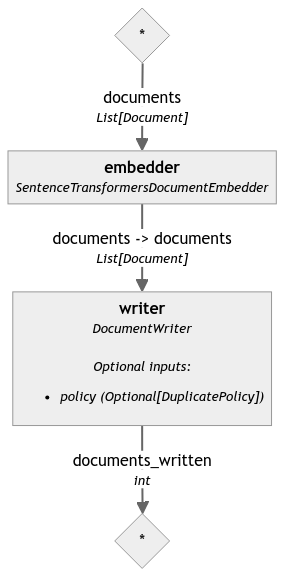

In [4]:
indexing.show()

In [5]:
indexing.run({"embedder": {"documents": docs}})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/53.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/974M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


1_Pooling/config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'writer': {'documents_written': 2}}

In [6]:
doc_store.filter_documents()[0]

Document(id=82f43a27fd4664628ebf134ee660eaaa77aad3d6ea327b4cb093dff5c014a53f, content: 'Die deutschen Tischtennisspielerinnen Annett Kaufmann, Yuan Wan und Shan Xiaona
                    ...', embedding: vector of size 1024)

## 2. Mixedbread & Haystack Integration

This integration currently allwos you to also use Binary Quantization

In [7]:
!pip install mixedbread-ai-haystack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.7 MB/s eta 0:00:00


In [8]:
import os
from getpass import getpass

if "MXBAI_API_KEY" not in os.environ:
  os.environ['MXBAI_API_KEY'] = getpass("Your Mixedbread API Key: ")

Your Mixedbread API Key: ··········


In [9]:
from mixedbread_ai_haystack import  MixedbreadAIDocumentEmbedder
from mixedbread_ai import EncodingFormat

document_embedder = MixedbreadAIDocumentEmbedder(model="mixedbread-ai/deepset-mxbai-embed-de-large-v1",
                                                 encoding_format=EncodingFormat.BINARY)